In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data/nihaifeng/code/HeliosArtifact/simulator')
import utils

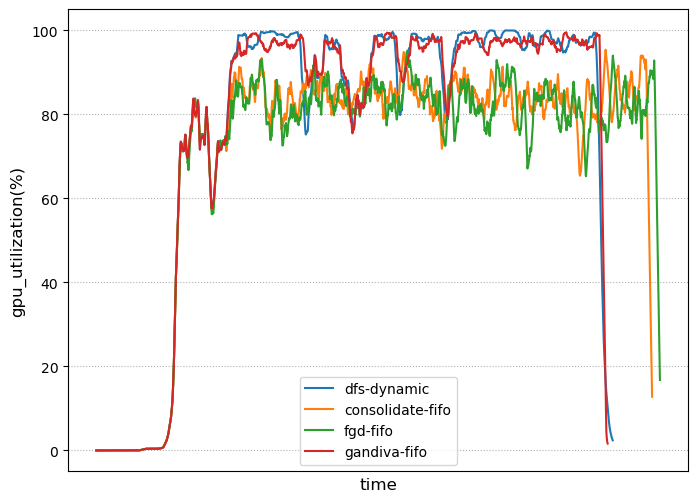

In [ ]:
# schedulers = ["defragS_sdf", "sjf_consolidate", "sjf_FGD", "gandiva_sjf"]
# labels = ["dfs", "consolidate", "fgd", "gandiva"]

schedulers = ["defragS_dynamic","fifo_consolidate", "fifo_FGD", "gandiva_fifo"]
labels = ["dfs-dynamic", "consolidate-fifo", "fgd-fifo", "gandiva-fifo"]


log_dir = f"/data/nihaifeng/log/test/ali20/" 
saving = False
window_size = 60 * 24 * 1

utilization = 'gpu_utilization' # fragmentation_ratio

fig = plt.figure(figsize=(8,6))
for idx, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir +f'ali20_{scheduler}/all/{scheduler}_all_seq.csv')
	y = df[utilization]*100
	plt.plot(df['time'], y.rolling(window=window_size).mean(), label=labels[idx])

plt.xlabel('time', fontsize=12)
plt.xticks([])
plt.ylabel(f'{utilization}(%)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(linestyle=':')
plt.show()

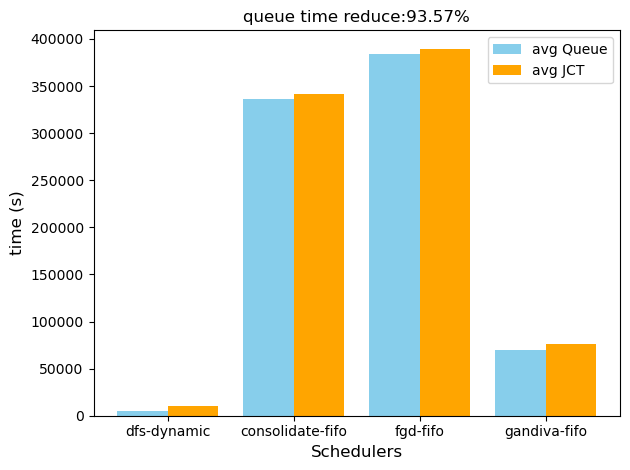

que_list:  [4512, 335917, 384257, 70209]
jct_list:  [9948, 341354, 389694, 75645]


In [7]:
que_list, jct_list = [], []
for scheduler in schedulers:
	df = pd.read_csv(log_dir+f'/ali20_{scheduler}/jct_avg.csv')
	jct_list.append(df.iloc[len(df)-1, 1])
	df = pd.read_csv(log_dir+f'/ali20_{scheduler}/que_avg.csv')
	que_list.append(df.iloc[len(df)-1, 1])
		

# 设置柱状图的宽度和位置
x_indices = np.arange(len(schedulers))  # x 轴位置
bar_width = 0.4  # 每个柱的宽度


# 绘制两组柱状图
plt.bar(x_indices - bar_width/2, que_list, bar_width, label='avg Queue', color='skyblue')
plt.bar(x_indices + bar_width/2, jct_list, bar_width, label='avg JCT', color='orange')

# 设置 x 轴标签
plt.xticks(x_indices, labels)
# plt.yticks([])

# 添加标题和坐标轴标签
plt.xlabel("Schedulers", fontsize=12)
plt.ylabel("time (s)", fontsize=12)

# 添加图例
plt.legend()
# 显示图表
dfs = que_list[0]
tmp = que_list[1:]
plt.title( f'queue time reduce:{(min(tmp)-dfs)/min(tmp)*100:.2f}%', fontsize=12)
plt.tight_layout()
plt.show()
print("que_list: ", que_list)
print("jct_list: ", jct_list)

317963
317963
317963
317963


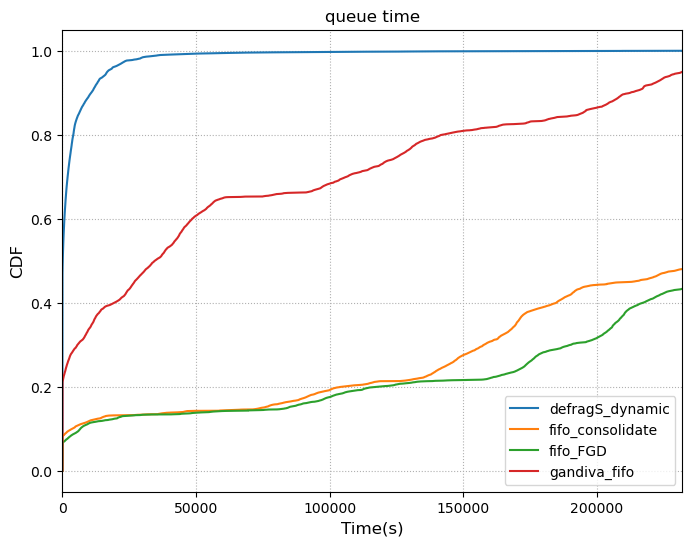

In [ ]:
data_type = "queue"
cluster = 'all'

fig = plt.figure(figsize=(8,6))
for idx, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir+f'/ali20_{scheduler}/{cluster}/{scheduler}_{cluster}_log.csv')
	df = df[df['gpu_num'] < 8]
	y = df[data_type]
	sorted_y = np.sort(y)
	cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
	plt.plot(sorted_y, cdf, label=scheduler)

x_min = np.min(sorted_y)
x_max = np.percentile(sorted_y, 95)  # 选择中位数作为最大范围
plt.xlim(x_min, x_max)  # 设置 x 轴范围

plt.title(f"{data_type} time")
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(linestyle=':')
plt.show()

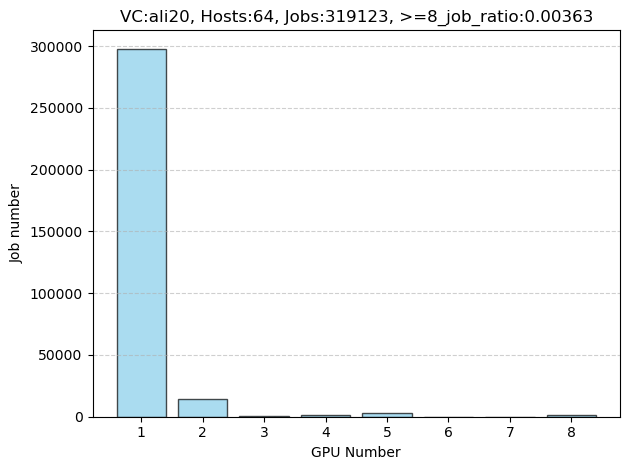

In [18]:
# 画每个VC的Job req GPUs 的统计直方图
trace_dir = '/data/nihaifeng/code/HeliosArtifact/simulator/data/ali20'
vc_dict = pd.read_pickle(trace_dir+'/vc_dict_homo.pkl')

trace_df, start_ts = utils.trace_ali20_process(trace_dir)
for vc_name, host_num in vc_dict.items():
	vc_df = trace_df[trace_df['vc'] == vc_name]
	gpu_num_type = vc_df['gpu_num'].unique()
	gpu_num_type = sorted(gpu_num_type)
	y = [len(vc_df[vc_df['gpu_num'] == x]) for x in gpu_num_type]
	
	plt.bar(gpu_num_type, y, color='skyblue', edgecolor='black', alpha=0.7)
	plt.xlabel('GPU Number')
	plt.ylabel('Job number')
	plt.title(f"VC:{vc_name}, Hosts:{host_num}, Jobs:{vc_df.shape[0]}, >=8_job_ratio:{sum([y[i] for i in range(len(gpu_num_type)) if gpu_num_type[i] >= 8])/vc_df.shape[0]:.5f}")
	plt.grid(axis='y', linestyle='--', alpha=0.6)
	plt.xticks(gpu_num_type)  # 设置x轴刻度为GPU数量
	plt.tight_layout()
	plt.show()